<a href="https://colab.research.google.com/github/pat-ch0/DataScience-intro/blob/main/Multiclass_Classification_reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chargement du jeu de données Reuters

# Train a small dense network on the Reuters data

### define a vectorizer

### import numpy

Importez NumPy en tant que 'np'.

In [1]:
import numpy as np

# Multiclass Classification 1.1

Vous allez travailler avec le jeu de données Reuters, un ensemble de dépêches courtes et leurs sujets, publié par Reuters en 1986. C'est un jeu de données simple et largement utilisé pour la classification de texte.

Il y a 46 sujets différents ; certains sujets sont plus représentés que d'autres, mais chaque sujet a au moins 10 exemples dans l'ensemble d'entraînement.

Cette code charge le jeu de données Reuters, qui est une collection d'articles de presse classés en différentes rubriques. Il est souvent utilisé pour les tâches de classification de texte.

Importez 'reuters' depuis 'keras.datasets'.

In [3]:
from keras.datasets import reuters

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Train a small dense network on the Reuters data

### Encoding the data

#### def vectorize_sequences

Cette fonction transforme des séquences de mots en vecteurs numériques où chaque élément du vecteur indique la présence (1) ou l'absence (0) d'un mot spécifique dans la séquence. Cette représentation vectorielle est essentielle pour que le réseau neuronal puisse traiter les données textuelles.

L'objectif est de transformer une liste de séquences (dans ce cas, des articles de presse représentés par des séquences de nombres) en une représentation vectorielle, utilisable par un réseau neuronal.

In [11]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

`num_words=10000`: Cet argument spécifie que nous voulons uniquement conserver les 10 000 mots les plus fréquents du jeu de données. Les mots moins fréquents seront ignorés. Cela est fait pour réduire la complexité des données.

* On crée une matrice remplie de zéros à l'aide de la fonction np.zeros.
* enumerate permet d'obtenir à la fois l'index (i) et la valeur (sequence) de chaque élément de la liste.
* `results[i, sequence] = 1:` est le cœur de la vectorisation. Pour chaque mot présent dans la sequence courante, on met à 1 la valeur correspondante dans la ligne i de la matrice results.
En d'autres termes, si le mot d'index 54 est présent dans la séquence, on mettra `results[i, 54]` à 1.

#### Encoding the data 1.0

Veuillez importer la fonction 'to_categorical' depuis 'tensorflow.keras.utils'. Ensuite, appliquez cette fonction à 'train_labels' et 'test_labels' pour créer respectivement 'one_hot_train_labels' et 'one_hot_test_labels'.

In [6]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

**Qu'est-ce que le "one-hot encoding" ?**

Imaginez que vous avez 4 catégories : "sport", "finance", "technologie", "santé". Au lieu de représenter ces catégories par des nombres (1, 2, 3, 4), le "one-hot encoding" les représente par des vecteurs binaires :

- "sport" : [1, 0, 0, 0]
- "finance" : [0, 1, 0, 0]
- "technologie" : [0, 0, 1, 0]
- "santé" : [0, 0, 0, 1]

Chaque vecteur a un seul "1" à la position correspondant à la catégorie et des "0" partout ailleurs.

**Pourquoi utiliser le "one-hot encoding" ?**

Les réseaux neuronaux fonctionnent mieux avec des données numériques. Le "one-hot encoding" permet de représenter des catégories de manière numérique sans imposer un ordre artificiel entre elles (contrairement à l'utilisation de simples nombres). Cela évite de biaiser l'apprentissage du réseau neuronal.

En résumé, ce code prépare les étiquettes de catégories des données d'entraînement et de test pour qu'elles puissent être utilisées efficacement par un réseau neuronal pour la classification de texte.

### Defining the network

### Defining the network 1.1

Importez 'models' et 'layers' depuis 'keras'.

In [7]:
from keras import models, layers

Veuillez créer un modèle séquentiel nommé 'model'. Ajoutez-y successivement trois couches Dense :

1. Une première couche avec 64 unités, une fonction d'activation 'relu', et une forme d'entrée de (10000,).
2. Une deuxième couche avec 64 unités et une fonction d'activation 'relu'.
3. Une troisième couche avec 46 unités et une fonction d'activation 'softmax'

In [8]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Defining the optimizer and the loss

Veuillez compiler le modèle en utilisant l'optimiseur 'rmsprop', la fonction de perte 'categorical_crossentropy', et la métrique 'accuracy'.

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Defining a validation set

### Encoding the data 1.1

### Encoding the data 1.2

Veuillez appliquer la fonction 'vectorize_sequences' aux données d'entraînement ('train_data') et aux données de test ('test_data') pour créer respectivement les variables 'x_train' et 'x_test'.

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### Defining a validation set 1.1

Veuillez créer un ensemble de validation en utilisant les 1000 premières données de 'x_train' et 'one_hot_train_labels' et nommez-les respectivement 'x_val' et 'y_val'. Créez également des ensembles d'entraînement partiels en utilisant les données restantes de 'x_train' et 'one_hot_train_labels' et nommez-les respectivement 'partial_x_train' et 'partial_y_train'.

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Training with a validation set

Veuillez entraîner le modèle en utilisant 'partial_x_train' et 'partial_y_train' comme données d'entraînement, 'x_val' et 'y_val' comme données de validation, pendant 20 epochs avec une taille de batch de 512. Stockez l'historique d'entraînement dans une variable nommée 'history'.

In [17]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.4113 - loss: 3.2637 - val_accuracy: 0.6120 - val_loss: 1.8836
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6610 - loss: 1.6865 - val_accuracy: 0.6950 - val_loss: 1.3998
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7299 - loss: 1.2587 - val_accuracy: 0.7350 - val_loss: 1.1916
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7845 - loss: 1.0069 - val_accuracy: 0.7630 - val_loss: 1.0968
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8119 - loss: 0.8553 - val_accuracy: 0.7890 - val_loss: 1.0085
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8453 - loss: 0.7099 - val_accuracy: 0.8060 - val_loss: 0.9438
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8700 - loss: 0.6036 - val_accuracy: 0.8070 - val_loss: 0.9050
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9018 - loss: 0.4778 - val_accuracy: 0.8180 - 

### Visualize the training

Veuillez visualiser l'historique d'entraînement en utilisant Matplotlib. Tracez un graphique affichant la perte d'entraînement et la perte de validation en fonction des epochs. Nommez le graphique 'Training and validation loss', étiquetez l'axe des x 'Epochs', l'axe des y 'Loss', et ajoutez une légende pour identifier les courbes.

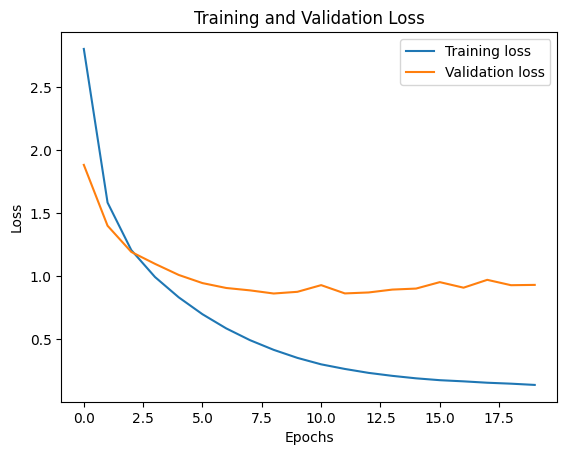

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Further experiments

#### Train on less epochs

Veuillez entraîner le modèle en utilisant 'partial_x_train' et 'partial_y_train' comme données d'entraînement, 'x_val' et 'y_val' comme données de validation, pendant 2 epochs avec une taille de batch de 512. Stockez l'historique d'entraînement dans une variable nommée 'history_1'.

In [21]:
history_1 = model.fit(partial_x_train, partial_y_train, epochs=2, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/2
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9638 - loss: 0.1165 - val_accuracy: 0.8060 - val_loss: 0.9507
Epoch 2/2
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9604 - loss: 0.1159 - val_accuracy: 0.7930 - val_loss: 1.0357


#### Visualize the training 1.1

Veuillez visualiser l'historique d'entraînement stocké dans 'history_1' en utilisant Matplotlib. Tracez un graphique affichant la perte d'entraînement et la perte de validation en fonction des epochs.
Nommez le graphique 'Training and validation loss 1', étiquetez l'axe des x 'Epochs', l'axe des y 'Loss 1', et ajoutez une légende pour identifier les courbes. Les courbes doivent être différenciées par un label 'Training loss 1' et 'Validation loss 1'.

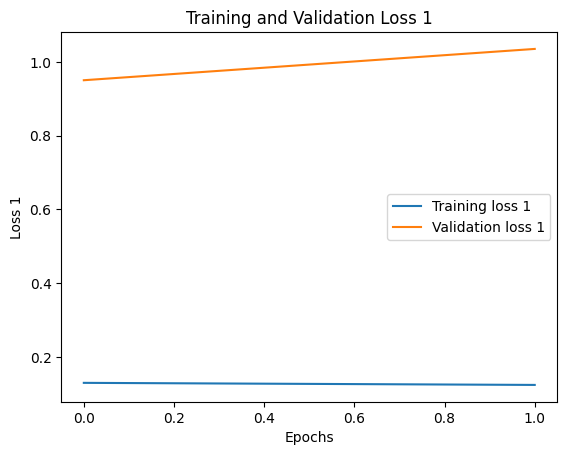

In [22]:
plt.plot(history_1.history['loss'], label='Training loss 1')
plt.plot(history_1.history['val_loss'], label='Validation loss 1')
plt.title('Training and Validation Loss 1')
plt.xlabel('Epochs')
plt.ylabel('Loss 1')
plt.legend()
plt.show()

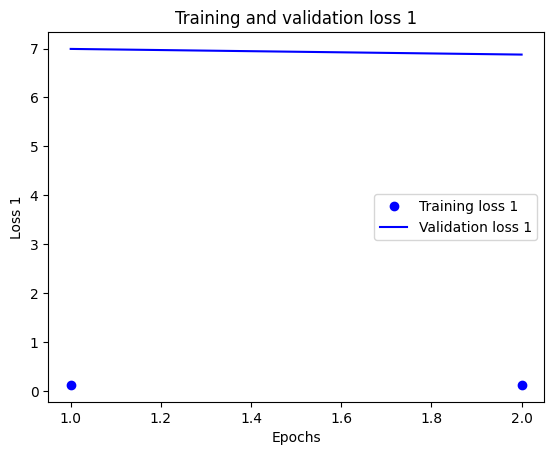

#### Try using larger or smaller layers

##### 32 **units**

###### Defining the network 1.2

Veuillez créer un modèle séquentiel nommé 'model_1'. Ajoutez-y successivement trois couches Dense :

1. Une première couche avec 32 unités, une fonction d'activation 'relu', et une forme d'entrée de (1000,).
2. Une deuxième couche avec 32 unités et une fonction d'activation 'relu'.
3. Une troisième couche avec 46 unités et une fonction d'activation 'softmax'.

In [23]:
model_1 = models.Sequential()
model_1.add(layers.Dense(32, activation='relu', input_shape=(1000,)))
model_1.add(layers.Dense(32, activation='relu'))
model_1.add(layers.Dense(46, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Defining the network 1.3

Defining the optimizer and the loss

Veuillez compiler le modèle 'model_1' en utilisant l'optimiseur 'rmsprop', la fonction de perte 'categorical_crossentropy', et la métrique 'accuracy'.

In [24]:
model_1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Veuillez créer un modèle séquentiel nommé 'model_2'. Ajoutez-y successivement trois couches Dense :

1. Une première couche avec 128 unités, une fonction d'activation 'relu', et une forme d'entrée de (10000,).
2. Une deuxième couche avec 128 unités et une fonction d'activation 'relu'.
3. Une troisième couche avec 46 unités et une fonction d'activation 'softmax'.

In [26]:
model_2 = models.Sequential()
model_2.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(46, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###### Defining the network 1.4

###### Defining the optimizer and the loss

Veuillez compiler le modèle nommé 'model_2' en utilisant l'optimiseur 'rmsprop', la fonction de perte 'categorical_crossentropy', et la métrique 'accuracy'.

In [27]:
model_2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Veuillez entraîner le modèle nommé 'model_2' en utilisant 'partial_x_train' et 'partial_y_train' comme données d'entraînement, 'x_val' et 'y_val' comme données de validation, pendant 2 epochs avec une taille de batch de 512. Stockez l'historique d'entraînement dans une variable nommée 'history_1_2'.

In [28]:
history_1_2 = model_2.fit(partial_x_train, partial_y_train, epochs=2, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/2
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.4321 - loss: 2.9679 - val_accuracy: 0.6250 - val_loss: 1.5686
Epoch 2/2
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.6977 - loss: 1.3723 - val_accuracy: 0.7300 - val_loss: 1.1818


Veuillez visualiser l'historique d'entraînement stocké dans 'history_1_2' en utilisant Matplotlib. Tracez un graphique affichant la perte d'entraînement et la perte de validation en fonction des epochs. Nommez le graphique 'Training and validation loss 1_2', étiquetez l'axe des x 'Epochs 1_2', l'axe des y 'Loss 1_2', et ajoutez une légende pour identifier les courbes. Les courbes doivent être différenciées par un label 'Training loss 1_2' et 'Validation loss 1_2'.

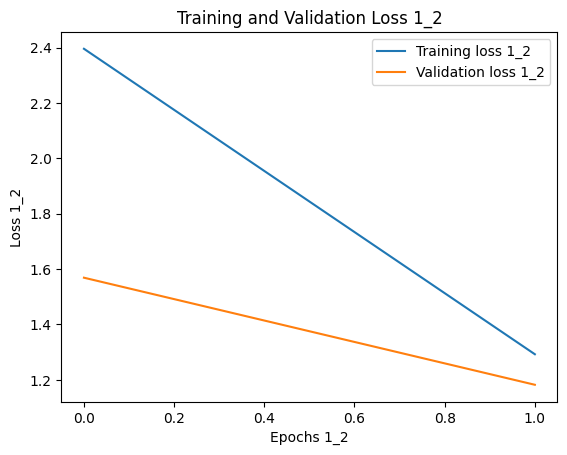

In [29]:
plt.plot(history_1_2.history['loss'], label='Training loss 1_2')
plt.plot(history_1_2.history['val_loss'], label='Validation loss 1_2')
plt.title('Training and Validation Loss 1_2')
plt.xlabel('Epochs 1_2')
plt.ylabel('Loss 1_2')
plt.legend()
plt.show()

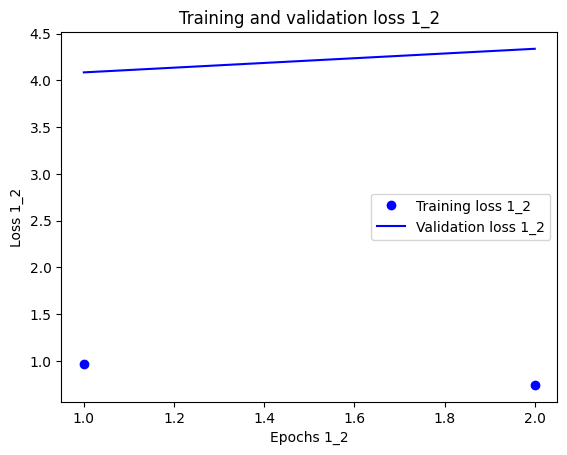